# Lab 1: Econometrics | Office Hours

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from scipy.optimize import minimize

In [2]:
# Generate example data
np.random.seed(42)
n_obs = 100
x = np.linspace(0, 10, n_obs)
epsilon = np.random.normal(0, 1, n_obs)
y = 2 * x + 1 + epsilon

In [5]:
epsilon

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [4]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [6]:
y

array([ 1.49671415,  1.0637559 ,  2.05172894,  3.12909046,  1.57392743,
        1.77596405,  3.79133403,  3.18157614,  2.14668723,  3.36074186,
        2.55678433,  2.75649247,  3.6662047 ,  1.71298238,  2.103365  ,
        3.4680155 ,  3.21949211,  4.74859077,  3.72833956,  3.42608014,
        6.50605281,  5.01664794,  5.51197265,  4.22171646,  5.30410212,
        6.16142764,  5.10153168,  6.83024347,  6.05592697,  6.56689211,
        6.45889945,  9.11490445,  7.45114924,  6.60895574,  8.69123178,
        6.84986342,  8.48159087,  6.51507735,  7.34858163,  9.07564911,
        9.81927466,  9.45419656,  9.3692002 ,  9.38576499,  8.4103669 ,
        9.37106488,  9.83229052, 11.55207172, 11.04058799,  9.13594974,
       11.42509407, 10.91794802, 10.8281285 , 12.318747  , 12.94009043,
       13.04239123, 11.47391379, 12.20593914, 13.04843515, 13.89473705,
       12.64203788, 13.13757335, 12.41891755, 12.5310661 , 14.74181875,
       15.48755316, 14.26132321, 15.53888643, 15.09900976, 14.29

In [7]:
# Create a DataFrame
data = pd.DataFrame({'y': y, 'x': x})

In [9]:
data.head()

,y,x
0,1.496714,0.000000
1,1.063756,0.101010
2,2.051729,0.202020
3,3.129090,0.303030
4,1.573927,0.404040
5,1.775964,0.505051
6,3.791334,0.606061
7,3.181576,0.707071
8,2.146687,0.808081
9,3.360742,0.909091


In [16]:
# Fit linear regresion
X = sm.add_constant(data['x'])  # Add the constant for the intercept
model = sm.OLS(data['y'], X).fit()

In [17]:
# Regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4146.
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           5.23e-82
Time:                        22:37:46   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8272      0.181      4.570      0.0

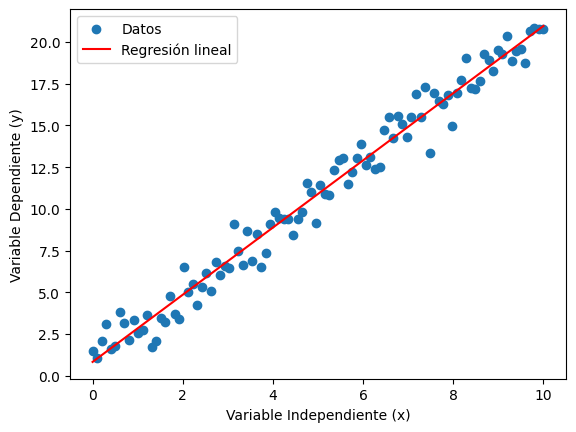

In [ ]:
# linear regresion plot
plt.scatter(x, y, label='Datos')
plt.plot(x, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()

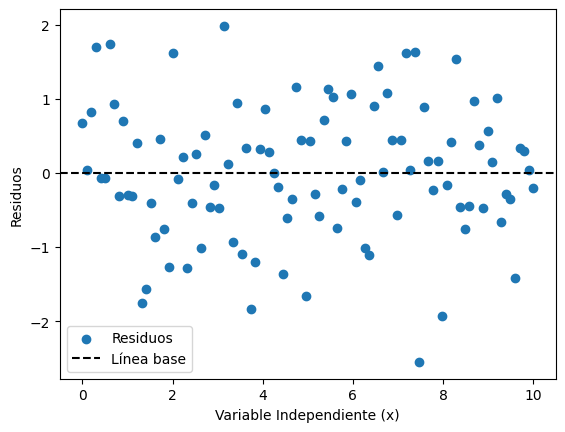

In [ ]:
# Model residuals
residuals = model.resid

# Residuals plot
plt.scatter(data['x'], residuals, label='Residuos')
plt.axhline(y=0, color='black', linestyle='--', label='Línea base')
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Residuos')
plt.legend()
plt.show()

In [18]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
          y         x
y  1.000000  0.988388
x  0.988388  1.000000


# Simple Linear Regression

This is a simple linear regression model as in every econometrics textbooks where
 is dependent variable,
 is independent variable and
 is disturbance term.
 and
 are unknown parameters that we are aiming to estimate by feeding the data in the model. Without disturbance term, the model is simple a function of a straight line in
, such as

In the context of machine learning (ML), the
 is usually called feature variable and
 called target variable. And linear regression is the main tool in supervised learning, meaning that
 is supervising
.

# Simple Linear Regression

This is a simple linear regression model, as in every econometrics textbook, where:  
- \( y \) is the dependent variable,  
- \( x \) is the independent variable, and  
- \( \epsilon \) is the disturbance term.

\( \beta_0 \) and \( \beta_1 \) are unknown parameters that we aim to estimate by feeding the data into the model. Without the disturbance term, the model is simply a function of a straight line in \( x \), such as:

\[
y = \beta_0 + \beta_1 x + \epsilon
\]

In the context of machine learning (ML):  
- \( x \) is usually called the **feature variable**, and  
- \( y \) is called the **target variable**.  

Linear regression is a key tool in supervised learning, meaning that \( y \) supervises the process.


In [24]:
X = np.linspace(1, 10, 10)
Y = 2 + 3*X
print(X)
print(Y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 5.  8. 11. 14. 17. 20. 23. 26. 29. 32.]


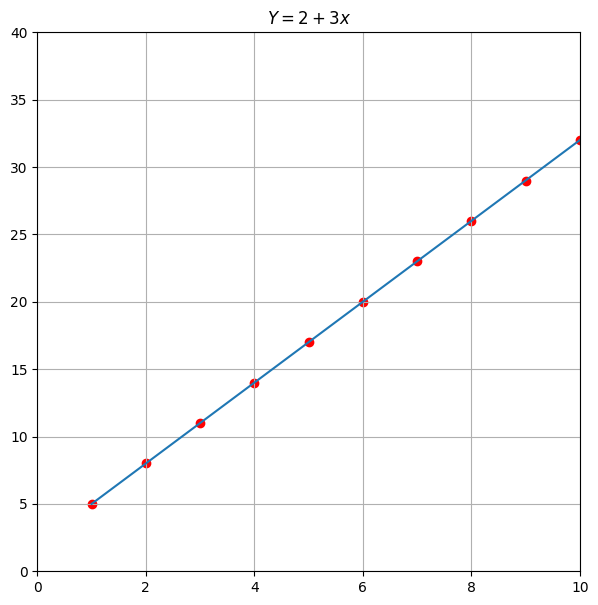

In [20]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.plot(X, Y)
ax.scatter(X, Y, c ='r')
ax.grid()
ax.set_title('$Y=2+3x$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 40)
plt.show()

This is a simple linear regression model as in every econometrics textbooks
where
 is dependent variable,
 is independent variable and
 is disturbance term.
 and
 are unknown parameters that we are aiming to estimate by feeding the data in the model. Without disturbance term, the model is simple a function of a straight line in
, such as

In the context of machine learning (ML), the
 is usually called feature variable and
 called target variable. And linear regression is the main tool in supervised learning, meaning that
 is supervising
.

There are five reasons justified that we need a disturbance term:

1. omission of independent variables
2. aggregation of variables
3. model misspecification
4. function misspecification, eg. should be nonlinear rather than linear
5. measurement error

The second one means that if we intend to aggregate the variable to a macro level, for instance every family has a consumption function, but aggregation on a national level causes discrepancies which contribute to the disturbance term.

The third and forth one will be discussed in details in later chapter.

The fifth one includes all types of error, man-made or natural.

Odinary Least Squares
Odinary Least Squares is the most common estimation technique used in ML or econometrics, it is popular due to its simplicity and transparency. You'll be able to derive the whole estimation process by hand-calculation, all steps will have closed-form expression.

We'll demonstrate OLS with our first plot. Every time you run this script, the result will be different than mine, because no random seeds are set.

<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\fuent\AppData\Local\Temp\ipykernel_44416\892107218.py:22: SyntaxWarning: invalid escape sequence '\h'
  ax.set_title('$\hat Y ={}+{}X$'.format(beta1, beta2))


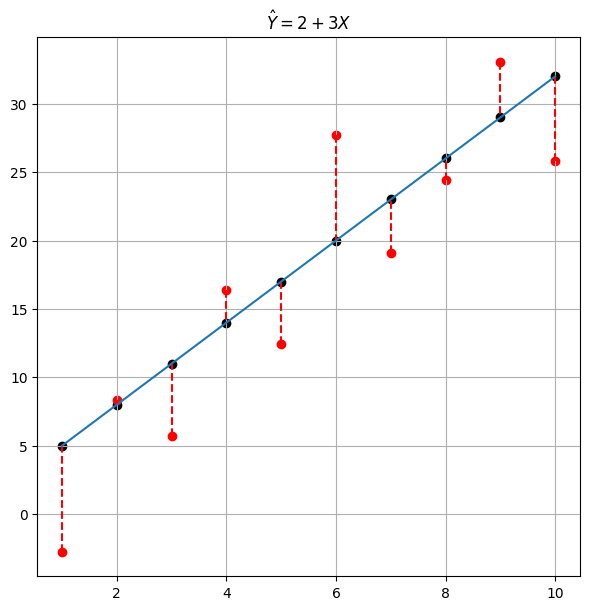

In [28]:
beta1, beta2 = 2, 3
def gen_linreg_data(beta1, beta2, samp_size, disturb_scale):

    X = np.linspace(1, 10, samp_size)
    u = disturb_scale * np.random.randn(samp_size)
    Y = beta1 + beta2*X + u
    Y_hat = beta1 + beta2*X
    return X, Y, Y_hat

def plot_lin_reg(X, Y, Y_hat):
    fig, ax = plt.subplots(figsize = (7, 7))

    for i in range(len(Y)):
        dot_fit_values = [X[i], X[i]]
        dot_org_values = [Y[i], Y_hat[i]]
        ax.plot(dot_fit_values, dot_org_values, linestyle = '--', color = 'red', label = 'residual')

    ax.plot(X, Y_hat)
    ax.scatter(X, Y_hat, c = 'k')
    ax.scatter(X, Y, c ='r')
    ax.grid()
    ax.set_title('$\hat Y ={}+{}X$'.format(beta1, beta2))
    plt.show()

if __name__ == '__main__':
    X, Y, Y_hat = gen_linreg_data(beta1=beta1, beta2=beta2, samp_size=10, disturb_scale=5)
    plot_lin_reg(X, Y, Y_hat)

In [54]:
X, Y, Y_hat = gen_linreg_data(beta1=4, beta2=2, samp_size=15, disturb_scale=3)

In [55]:
class S_OLS:
    '''Create instances with S_OLS(X, Y), where X and Y are data array.'''
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def ols(self):
        '''Estimate the data with OLS method, and return b1 and b2.'''
        cov_mat = np.cov(self.X, self.Y)
        self.b2 = cov_mat[0, 1]/cov_mat[0, 0]
        self.b1 = np.mean(self.Y) - self.b2*np.mean(self.X)
        self.Y_hat = self.b1 + self.b2*self.X
        print('b1 estimate: {:.4f}'.format(self.b1))
        print('b2 estimate: {:.4f}'.format(self.b2))
        return self.Y_hat, self.b2, self.b1

    def simul_plot(self, beta1, beta2):
        '''Plot scatter plot and fitted line with ols_plot(self, beta1, beta2),
        beta1 and beta2 are parameters of data generation process.'''
        fig, ax = plt.subplots(figsize = (7, 7))
        for i in range(len(Y)):
            dot_fit_values = [self.X[i], self.X[i]]
            dot_org_values = [self.Y[i], self.Y_hat[i]]
            ax.plot(dot_fit_values, dot_org_values, linestyle = '--', color = 'red')
        ax.scatter(self.X, self.Y_hat, c = 'k')
        ax.scatter(self.X, self.Y, c ='r')
        ax.plot(self.X, self.Y_hat, label = '$b_1$= {:.2f}, $b_2$={:.2f}'.format(b1, b2))
        ax.grid()
        ax.set_title('$\hat Y ={:.2f}+{:.2f}X$'.format(b1, b2))
        Y_hat_perfect = beta1 + beta2*X
        ax.plot(X, Y_hat_perfect, label = r'$\beta_1=2, \beta_2=3$')
        ax.legend()
        plt.show()

    def ols_plot(self, xlabel, ylabel):
        self.xlabel = xlabel
        self.ylabel = ylabel
        fig, ax = plt.subplots(figsize=(7, 7))
        
        # Plot observed values (red) and fitted values (blue)
        ax.scatter(self.X, self.Y, c='r', label='Observed Values (Y)')
        ax.scatter(self.X, self.Y_hat, c='b', label='Fitted Values (Ŷ)')
        
        # Plot regression line
        ax.plot(self.X, self.Y_hat, label=f'Regression Line ($b_1$ = {self.b1:.2f}, $b_2$ = {self.b2:.2f})', color='black')
        
        # Add grid, title, labels, and legend
        ax.grid()
        ax.set_title(f'$\\hat Y = {self.b1:.2f} + {self.b2:.2f}X$', fontsize=14)
        ax.set_xlabel(self.xlabel, fontsize=12)
        ax.set_ylabel(self.ylabel, fontsize=12)
        ax.legend()  # Add legend to indicate what each color represents

    def r_sq(self):
        '''Calculate coefficient of determination and correlation of Y and Yhat'''
        self.ESS = np.var(self.Y_hat)
        self.RSS = np.var(self.Y-self.Y_hat)
        self.R_sq = self.ESS/self.RSS
        return self.ESS, self.RSS, self.R_sq

<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
C:\Users\fuent\AppData\Local\Temp\ipykernel_44416\3696427204.py:29: SyntaxWarning: invalid escape sequence '\h'
  ax.set_title('$\hat Y ={:.2f}+{:.2f}X$'.format(b1, b2))


In [56]:
df = pd.read_excel('../data/Basic_Econometrics_practice_data.xlsx', 
                   sheet_name = 'CN_Cities_house_price')
df.head()

,cities,house_price,salary
0,Shenzhen,87957,64878
1,Beijing,64721,69434
2,Shanghai,59072,72232
3,Xiamen,49803,58140
4,Guangzhou,39851,68304


In [57]:
s_ols_house_income = S_OLS(df['salary'], df['house_price'])
Y_hat, b2, b1 = s_ols_house_income.ols()

b1 estimate: -29181.1698
b2 estimate: 1.1010


In [61]:
model1 = smf.ols('house_price ~ salary ', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     13.21
Date:                Fri, 17 Jan 2025   Prob (F-statistic):            0.00139
Time:                        23:22:38   Log-Likelihood:                -274.08
No. Observations:                  25   AIC:                             552.2
Df Residuals:                      23   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.918e+04   1.66e+04     -1.758      0.0

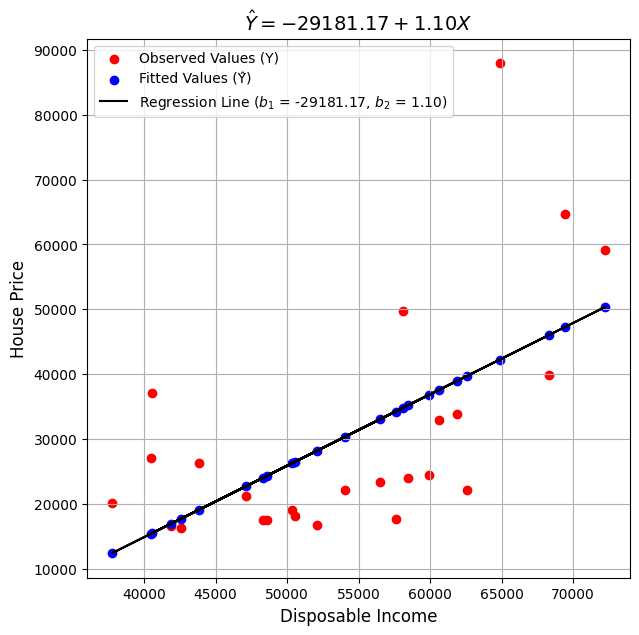

In [58]:
s_ols_house_income.ols_plot('Disposable Income', 'House Price')

In [49]:
epsilon = df['house_price'] - Y_hat
np.mean(epsilon)

np.float64(2.473825588822365e-12)

In [59]:
print('Mean of Y hat: {}'.format(np.mean(Y_hat)))
print('Mean of Y: {}'.format(np.mean(df['house_price'])))

Mean of Y hat: 30218.88
Mean of Y: 30218.88
